In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('../..')

In [3]:
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv

from vimms_gym.env import DDAEnv
from vimms_gym.features import obs_to_dfs
from experiments import preset_qcb_small

# Sequential DDA environment test

In [4]:
alpha = 0.25
beta = 0.0
extract = False
params, max_peaks = preset_qcb_small(None, alpha=alpha, beta=beta, extract_chromatograms=extract)
params, max_peaks

2022-08-25 12:39:59.312 | INFO     | experiments:get_samplers:283 - Loaded /Users/joewandy/Work/git/vimms-gym/pickles/samplers_QCB_small_gaussian.p


({'chemical_creator': {'mz_range': (100, 110),
   'rt_range': (400, 500),
   'intensity_range': (10000.0, 1e+20),
   'n_chemicals': (20, 50),
   'mz_sampler': <vimms.ChemicalSamplers.MZMLFormulaSampler at 0x7ff566041940>,
   'ri_sampler': <vimms.ChemicalSamplers.MZMLRTandIntensitySampler at 0x7ff540d3bdc0>,
   'cr_sampler': <vimms.ChemicalSamplers.GaussianChromatogramSampler at 0x7ff5660654f0>},
  'noise': {'enable_spike_noise': True,
   'noise_density': 0.1,
   'noise_max_val': 1000.0,
   'mz_range': (100, 110)},
  'env': {'ionisation_mode': 'Positive',
   'rt_range': (400, 500),
   'isolation_window': 0.7,
   'mz_tol': 10,
   'rt_tol': 120,
   'alpha': 0.25,
   'beta': 0.0}},
 100)

Initialise a new DDA environment that tracks the top most intense peaks.

In [5]:
env = DDAEnv(max_peaks, params)
env.reset()

{'intensities': array([0.14638253, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0

In [6]:
env = DDAEnv(max_peaks, params)
check_env(env)

Generate an initial observation (MS1 scan)

In [7]:
observation = env.reset()
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

(    intensities  fragmented  excluded  roi_length  \
 0      0.133566         0.0       0.0         0.0   
 1      0.000000         0.0       0.0         0.0   
 2      0.000000         0.0       0.0         0.0   
 3      0.000000         0.0       0.0         0.0   
 4      0.000000         0.0       0.0         0.0   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0       0.0         0.0   
 96     0.000000         0.0       0.0         0.0   
 97     0.000000         0.0       0.0         0.0   
 98     0.000000         0.0       0.0         0.0   
 99     0.000000         0.0       0.0         0.0   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [8]:
observation['valid_actions']

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [9]:
env.features

[mz=108.95679059305621 rt=400 intensity=469.15631030415415 (0.13356587810511678) fragmented=False roi=ROI with data points=1 fragmentations=0 mz (108.9568-108.9568) rt (400.0000-400.0000)]

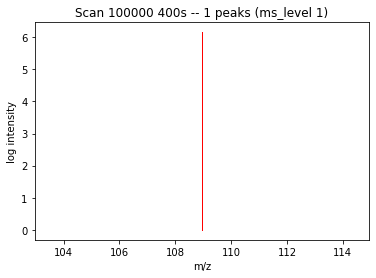

In [10]:
env.render()

Generate a lot of ms1 scans

In [11]:
for i in range(200):
    action = max_peaks  # ms1
    observation, reward, done, info = env.step(action)

print('reward', reward)
print('done', done)
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

reward 0.1
done False


(    intensities  fragmented  excluded  roi_length  \
 0      0.253004         0.0       0.0       0.196   
 1      0.231134         0.0       0.0       0.412   
 2      0.218036         0.0       0.0       0.300   
 3      0.213001         0.0       0.0       0.284   
 4      0.212051         0.0       0.0       0.264   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0       0.0       0.000   
 96     0.000000         0.0       0.0       0.000   
 97     0.000000         0.0       0.0       0.000   
 98     0.000000         0.0       0.0       0.000   
 99     0.000000         0.0       0.0       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [12]:
observation['valid_actions']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [13]:
env.features

[mz=104.16986339596679 rt=479.99999999999545 intensity=114839.0831636821 (0.253004485828918) fragmented=False roi=ROI with data points=50 fragmentations=0 mz (104.1699-104.1699) rt (460.4000-480.0000),
 mz=104.01054120741223 rt=479.99999999999545 intensity=41945.380620124124 (0.23113420698093662) fragmented=False roi=ROI with data points=104 fragmentations=0 mz (104.0105-104.0105) rt (438.8000-480.0000),
 mz=104.0258563606324 rt=479.99999999999545 intensity=22946.45788936697 (0.2180357827772658) fragmented=False roi=ROI with data points=76 fragmentations=0 mz (104.0259-104.0259) rt (450.0000-480.0000),
 mz=110.91917739975436 rt=479.99999999999545 intensity=18198.072679432993 (0.21300126975911823) fragmented=False roi=ROI with data points=72 fragmentations=0 mz (110.9192-110.9192) rt (451.6000-480.0000),
 mz=104.73766089883179 rt=479.99999999999545 intensity=17418.819541987017 (0.2120509359957744) fragmented=False roi=ROI with data points=67 fragmentations=0 mz (104.7377-104.7377) rt (4

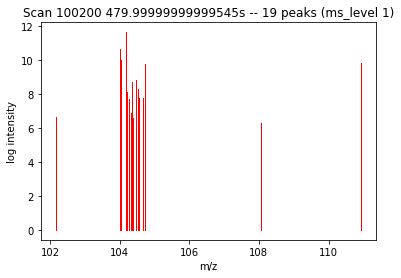

In [14]:
env.render()

Target the most intense precursor for fragmentation, and generate an MS2 scan from that

In [15]:
action = 0
observation, reward, done, info = env.step(action)

print('reward', reward)
print('done', done)
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

reward 0.3730225075985592
done False


(    intensities  fragmented  excluded  roi_length  \
 0      0.253004         1.0  0.003333       0.196   
 1      0.231134         0.0  0.000000       0.412   
 2      0.218036         0.0  0.000000       0.300   
 3      0.213001         0.0  0.000000       0.284   
 4      0.212051         0.0  0.000000       0.264   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0  0.000000       0.000   
 96     0.000000         0.0  0.000000       0.000   
 97     0.000000         0.0  0.000000       0.000   
 98     0.000000         0.0  0.000000       0.000   
 99     0.000000         0.0  0.000000       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [16]:
observation['valid_actions']

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [17]:
env.features

[mz=104.16986339596679 rt=479.99999999999545 intensity=114839.0831636821 (0.253004485828918) fragmented=True roi=ROI with data points=50 fragmentations=0 mz (104.1699-104.1699) rt (460.4000-480.0000),
 mz=104.01054120741223 rt=479.99999999999545 intensity=41945.380620124124 (0.23113420698093662) fragmented=False roi=ROI with data points=104 fragmentations=0 mz (104.0105-104.0105) rt (438.8000-480.0000),
 mz=104.0258563606324 rt=479.99999999999545 intensity=22946.45788936697 (0.2180357827772658) fragmented=False roi=ROI with data points=76 fragmentations=0 mz (104.0259-104.0259) rt (450.0000-480.0000),
 mz=110.91917739975436 rt=479.99999999999545 intensity=18198.072679432993 (0.21300126975911823) fragmented=False roi=ROI with data points=72 fragmentations=0 mz (110.9192-110.9192) rt (451.6000-480.0000),
 mz=104.73766089883179 rt=479.99999999999545 intensity=17418.819541987017 (0.2120509359957744) fragmented=False roi=ROI with data points=67 fragmentations=0 mz (104.7377-104.7377) rt (45

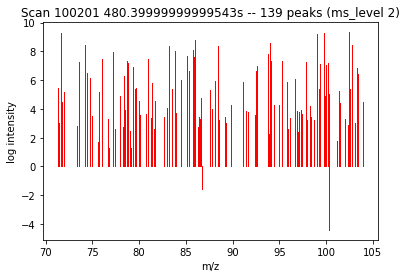

In [18]:
env.render()

Target the next most intense precursor for fragmentation, and generate an MS2 scan

In [19]:
action = 1
observation, reward, done, info = env.step(action)

print('reward', reward)
print('done', done)
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

reward 0.12776540380072912
done False


(    intensities  fragmented  excluded  roi_length  \
 0      0.253004         1.0     0.005       0.196   
 1      0.231134         1.0     0.005       0.412   
 2      0.218036         0.0     0.000       0.300   
 3      0.213001         0.0     0.000       0.284   
 4      0.212051         0.0     0.000       0.264   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0     0.000       0.000   
 96     0.000000         0.0     0.000       0.000   
 97     0.000000         0.0     0.000       0.000   
 98     0.000000         0.0     0.000       0.000   
 99     0.000000         0.0     0.000       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [20]:
observation['valid_actions']

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [21]:
env.features

[mz=104.16986339596679 rt=479.99999999999545 intensity=114839.0831636821 (0.253004485828918) fragmented=True roi=ROI with data points=50 fragmentations=0 mz (104.1699-104.1699) rt (460.4000-480.0000),
 mz=104.01054120741223 rt=479.99999999999545 intensity=41945.380620124124 (0.23113420698093662) fragmented=True roi=ROI with data points=104 fragmentations=0 mz (104.0105-104.0105) rt (438.8000-480.0000),
 mz=104.0258563606324 rt=479.99999999999545 intensity=22946.45788936697 (0.2180357827772658) fragmented=False roi=ROI with data points=76 fragmentations=0 mz (104.0259-104.0259) rt (450.0000-480.0000),
 mz=110.91917739975436 rt=479.99999999999545 intensity=18198.072679432993 (0.21300126975911823) fragmented=False roi=ROI with data points=72 fragmentations=0 mz (110.9192-110.9192) rt (451.6000-480.0000),
 mz=104.73766089883179 rt=479.99999999999545 intensity=17418.819541987017 (0.2120509359957744) fragmented=False roi=ROI with data points=67 fragmentations=0 mz (104.7377-104.7377) rt (453

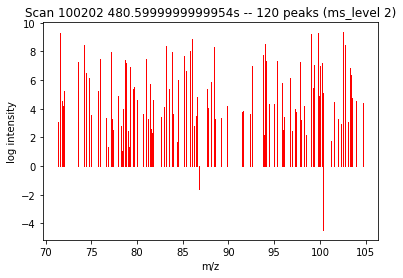

In [22]:
env.render()

Repeat targeting of the same precursor will end up targeting low-intensity spike noises (non-chemicals), which produce no reward

In [23]:
for i in range(10):
    action = 0
    observation, reward, done, info = env.step(action)
    print('reward', reward)
    # print('done', done)
    # pp.pprint(observation)
    # env.render()

reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0
reward -1.0


In [24]:
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

(    intensities  fragmented  excluded  roi_length  \
 0      0.253004         1.0  0.021667       0.196   
 1      0.231134         1.0  0.021667       0.412   
 2      0.218036         0.0  0.000000       0.300   
 3      0.213001         0.0  0.000000       0.284   
 4      0.212051         0.0  0.000000       0.264   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0  0.000000       0.000   
 96     0.000000         0.0  0.000000       0.000   
 97     0.000000         0.0  0.000000       0.000   
 98     0.000000         0.0  0.000000       0.000   
 99     0.000000         0.0  0.000000       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [25]:
observation['valid_actions']

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [26]:
env.features

[mz=104.16986339596679 rt=479.99999999999545 intensity=114839.0831636821 (0.253004485828918) fragmented=True roi=ROI with data points=50 fragmentations=0 mz (104.1699-104.1699) rt (460.4000-480.0000),
 mz=104.01054120741223 rt=479.99999999999545 intensity=41945.380620124124 (0.23113420698093662) fragmented=True roi=ROI with data points=104 fragmentations=0 mz (104.0105-104.0105) rt (438.8000-480.0000),
 mz=104.0258563606324 rt=479.99999999999545 intensity=22946.45788936697 (0.2180357827772658) fragmented=False roi=ROI with data points=76 fragmentations=0 mz (104.0259-104.0259) rt (450.0000-480.0000),
 mz=110.91917739975436 rt=479.99999999999545 intensity=18198.072679432993 (0.21300126975911823) fragmented=False roi=ROI with data points=72 fragmentations=0 mz (110.9192-110.9192) rt (451.6000-480.0000),
 mz=104.73766089883179 rt=479.99999999999545 intensity=17418.819541987017 (0.2120509359957744) fragmented=False roi=ROI with data points=67 fragmentations=0 mz (104.7377-104.7377) rt (453

Making an invalid move produces negative reward.

In [27]:
action = 50  # no precursor to fragment at this index
observation, reward, done, info = env.step(action)

print('reward', reward)
print('done', done)
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

reward -1.0
done False


(    intensities  fragmented  excluded  roi_length  \
 0      0.253004         1.0  0.023333       0.196   
 1      0.231134         1.0  0.023333       0.412   
 2      0.218036         0.0  0.000000       0.300   
 3      0.213001         0.0  0.000000       0.284   
 4      0.212051         0.0  0.000000       0.264   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0  0.000000       0.000   
 96     0.000000         0.0  0.000000       0.000   
 97     0.000000         0.0  0.000000       0.000   
 98     0.000000         0.0  0.000000       0.000   
 99     0.000000         0.0  0.000000       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                                0.0                         0.0   
 1                                0.0                         0.0   
 2                                0.0                         0.0   
 3                                0.0                         0.0   
 4   

In [28]:
observation['valid_actions']

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [29]:
env.features

[mz=104.16986339596679 rt=479.99999999999545 intensity=114839.0831636821 (0.253004485828918) fragmented=True roi=ROI with data points=50 fragmentations=0 mz (104.1699-104.1699) rt (460.4000-480.0000),
 mz=104.01054120741223 rt=479.99999999999545 intensity=41945.380620124124 (0.23113420698093662) fragmented=True roi=ROI with data points=104 fragmentations=0 mz (104.0105-104.0105) rt (438.8000-480.0000),
 mz=104.0258563606324 rt=479.99999999999545 intensity=22946.45788936697 (0.2180357827772658) fragmented=False roi=ROI with data points=76 fragmentations=0 mz (104.0259-104.0259) rt (450.0000-480.0000),
 mz=110.91917739975436 rt=479.99999999999545 intensity=18198.072679432993 (0.21300126975911823) fragmented=False roi=ROI with data points=72 fragmentations=0 mz (110.9192-110.9192) rt (451.6000-480.0000),
 mz=104.73766089883179 rt=479.99999999999545 intensity=17418.819541987017 (0.2120509359957744) fragmented=False roi=ROI with data points=67 fragmentations=0 mz (104.7377-104.7377) rt (453

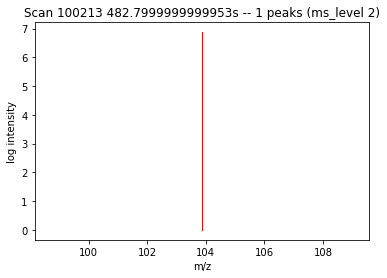

In [30]:
env.render()

Generate lots of MS1 scans

In [31]:
for i in range(10):
    action = max_peaks  # ms1
    observation, reward, done, info = env.step(action)
    print(reward, done, info)
    if done:
        break

print('reward', reward)
print('done', done)
scan_df, count_df = obs_to_dfs(observation, env.features)
scan_df, count_df

0.1 False {'current_scan_id': 100213}
0.1 False {'current_scan_id': 100214}
0.1 False {'current_scan_id': 100215}
0.1 False {'current_scan_id': 100216}
0.1 False {'current_scan_id': 100217}
0.1 False {'current_scan_id': 100218}
0.1 False {'current_scan_id': 100219}
0.1 False {'current_scan_id': 100220}
0.1 False {'current_scan_id': 100221}
0.1 False {'current_scan_id': 100222}
reward 0.1
done False


(    intensities  fragmented  excluded  roi_length  \
 0      0.256825         0.0     0.055       0.262   
 1      0.246509         0.0     0.000       0.012   
 2      0.206978         0.0     0.000       0.366   
 3      0.205839         0.0     0.000       0.330   
 4      0.204333         0.0     0.000       0.350   
 ..          ...         ...       ...         ...   
 95     0.000000         0.0     0.000       0.000   
 96     0.000000         0.0     0.000       0.000   
 97     0.000000         0.0     0.000       0.000   
 98     0.000000         0.0     0.000       0.000   
 99     0.000000         0.0     0.000       0.000   
 
     roi_elapsed_time_since_last_frag  roi_intensity_at_last_frag  \
 0                           0.018871                    0.253004   
 1                           0.000000                    0.000000   
 2                           0.000000                    0.000000   
 3                           0.000000                    0.000000   
 4   

In [32]:
observation['valid_actions']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [33]:
env.features

[mz=104.16986339596679 rt=486.5999999999951 intensity=136932.36266760196 (0.2568253050827235) fragmented=False roi=ROI with data points=60 fragmentations=0 mz (104.1699-104.1699) rt (460.4000-486.6000),
 mz=104.96799300670416 rt=486.5999999999951 intensity=85150.31564230059 (0.24650931310903276) fragmented=False roi=ROI with data points=4 fragmentations=0 mz (104.9680-104.9680) rt (485.4000-486.6000),
 mz=104.0258563606324 rt=486.5999999999951 intensity=13790.03376099632 (0.20697826647121617) fragmented=False roi=ROI with data points=86 fragmentations=0 mz (104.0259-104.0259) rt (450.0000-486.6000),
 mz=104.73766089883179 rt=486.5999999999951 intensity=13085.48533955104 (0.2058394917610224) fragmented=False roi=ROI with data points=77 fragmentations=0 mz (104.7377-104.7377) rt (453.6000-486.6000),
 mz=110.91917739975436 rt=486.5999999999951 intensity=12208.448269588276 (0.204333023366035) fragmented=False roi=ROI with data points=82 fragmentations=0 mz (110.9192-110.9192) rt (451.6000-

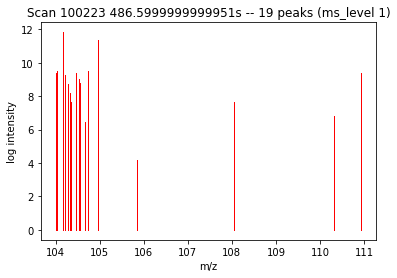

In [34]:
env.render()

Not doing any fragmentation (performing only MS1 scans) will receive a huge negative reward in the end.

In [35]:
def make_env(rank, seed=0):
    def _init():
        env = DDAEnv(max_peaks, params)
        return env
    return _init

env = DummyVecEnv([make_env(i) for i in range(1)])

In [36]:
env.reset()
for i in range(1000):
    action = [max_peaks]  # ms1
    observation, reward, done, info = env.step(action)
    print(reward, done, info)
    if done:
        break

print('reward', reward)
print('done', done)

[0.1] [False] [{'current_scan_id': 100000}]
[0.1] [False] [{'current_scan_id': 100001}]
[0.1] [False] [{'current_scan_id': 100002}]
[0.1] [False] [{'current_scan_id': 100003}]
[0.1] [False] [{'current_scan_id': 100004}]
[0.1] [False] [{'current_scan_id': 100005}]
[0.1] [False] [{'current_scan_id': 100006}]
[0.1] [False] [{'current_scan_id': 100007}]
[0.1] [False] [{'current_scan_id': 100008}]
[0.1] [False] [{'current_scan_id': 100009}]
[0.1] [False] [{'current_scan_id': 100010}]
[0.1] [False] [{'current_scan_id': 100011}]
[0.1] [False] [{'current_scan_id': 100012}]
[0.1] [False] [{'current_scan_id': 100013}]
[0.1] [False] [{'current_scan_id': 100014}]
[0.1] [False] [{'current_scan_id': 100015}]
[0.1] [False] [{'current_scan_id': 100016}]
[0.1] [False] [{'current_scan_id': 100017}]
[0.1] [False] [{'current_scan_id': 100018}]
[0.1] [False] [{'current_scan_id': 100019}]
[0.1] [False] [{'current_scan_id': 100020}]
[0.1] [False] [{'current_scan_id': 100021}]
[0.1] [False] [{'current_scan_id